1. Initial Setup, Library Imports, and Data Loading

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE # For handling imbalanced data
import warnings

warnings.filterwarnings('ignore')


# Load the dataset

df = pd.read_excel('glass.xlsx',sheet_name='glass')
   

2. Exploratory Data Analysis (EDA)

In [4]:
# 1. Exploratory Data Analysis (EDA)

print("--- Exploratory Data Analysis (EDA) ---")

print("\nDataset Info:")
df.info()

print("\nDataset Description (Statistical Summary):")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Check unique values in the 'Type' (target) column
print("\nUnique values in 'Type' (target) column:", df['Type'].unique())
print("Value counts for 'Type':")
print(df['Type'].value_counts())

--- Exploratory Data Analysis (EDA) ---

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB

Dataset Description (Statistical Summary):
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0

3. Data Visualization

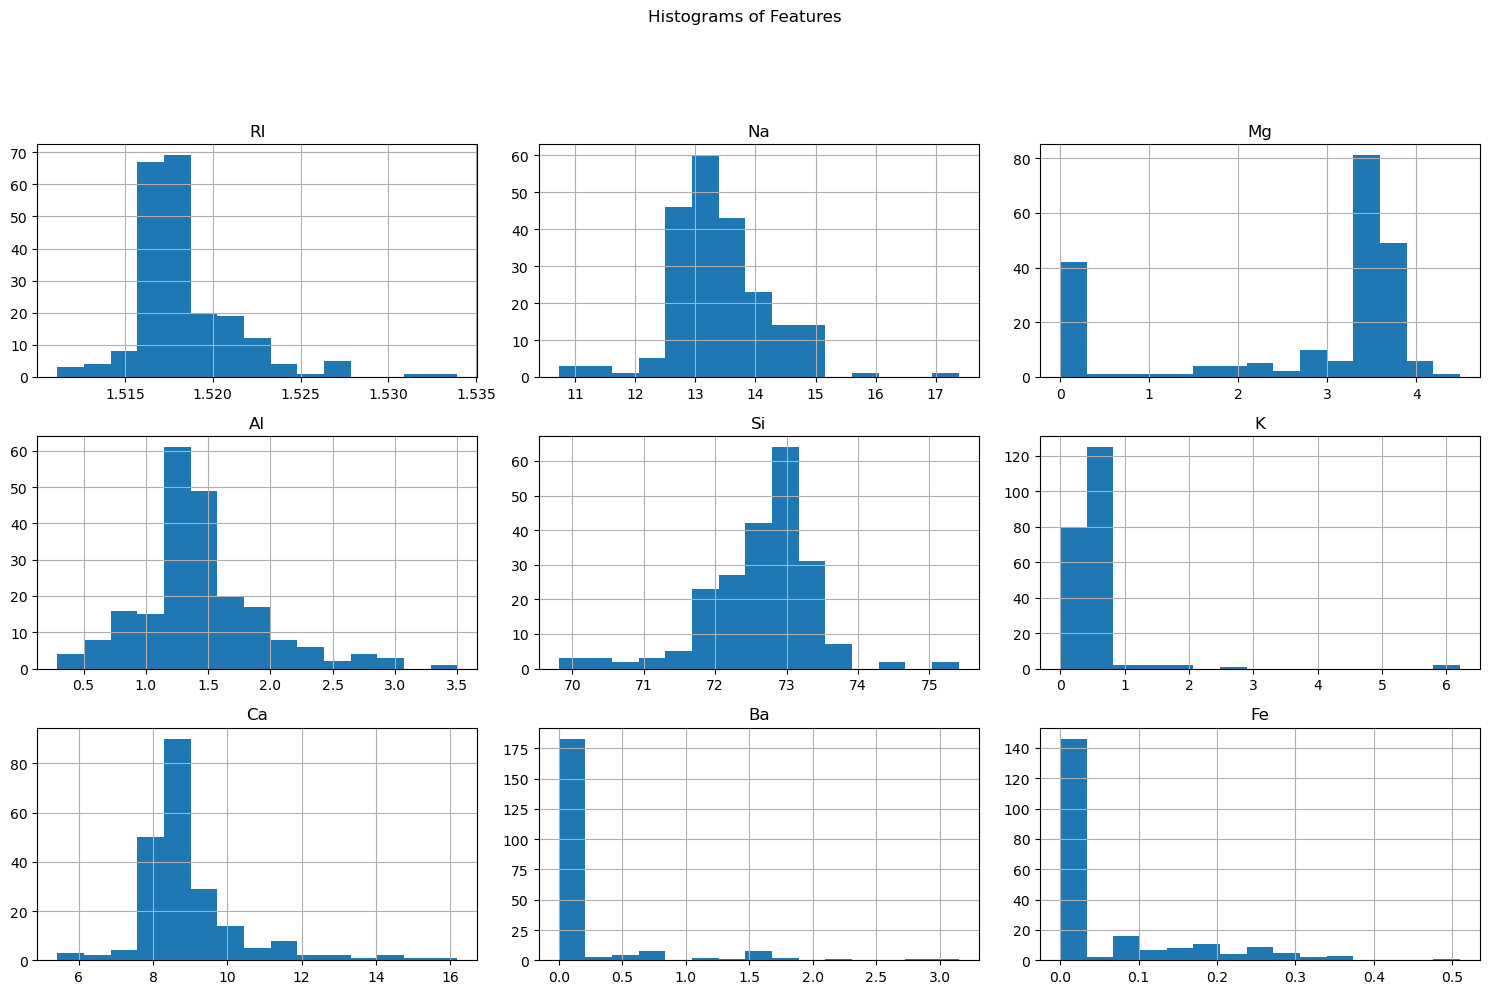

Displayed histograms for all numerical features.


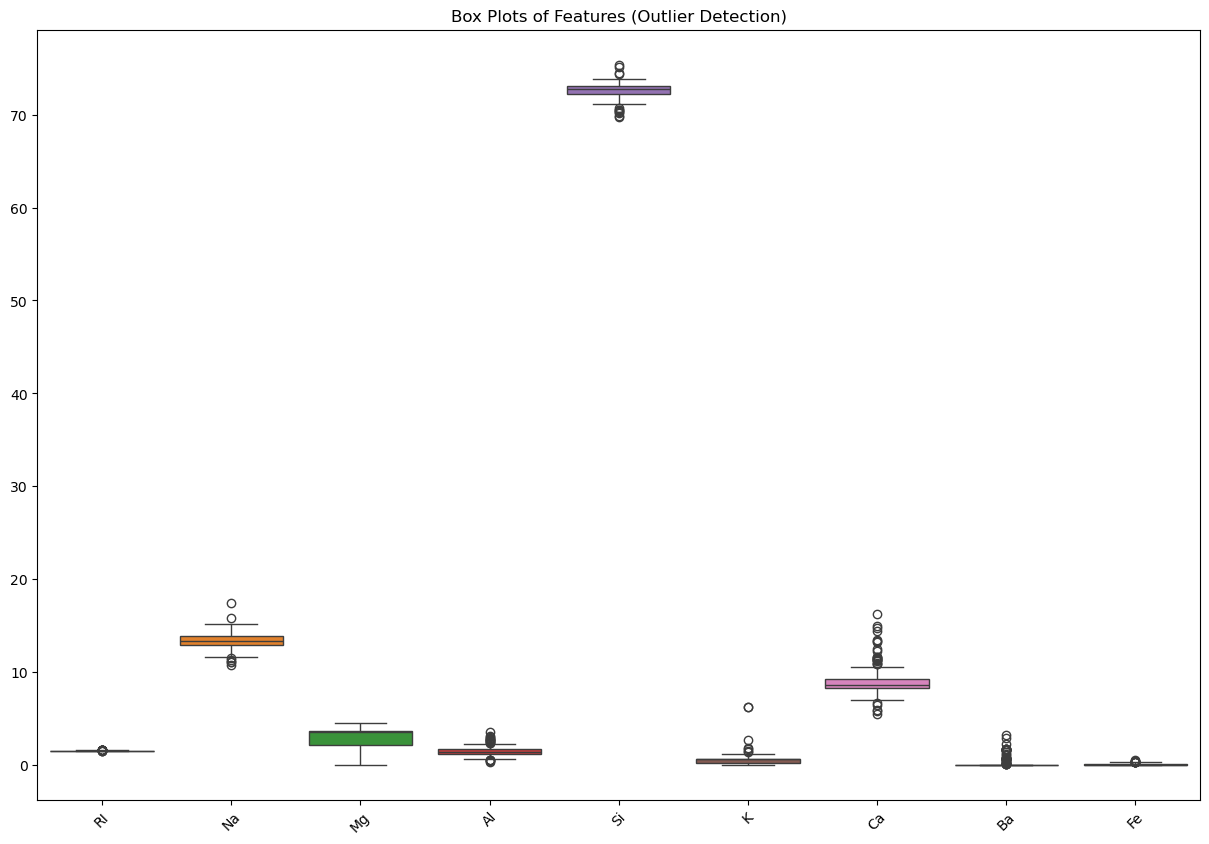

Displayed box plots for outlier detection.


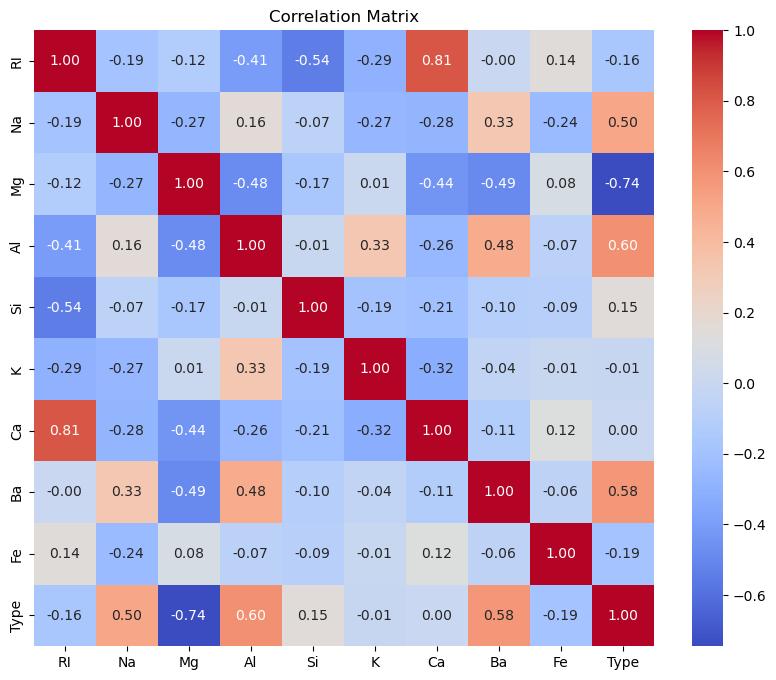

Displayed correlation matrix.


In [5]:

# Histograms for numerical features
df.drop('Type', axis=1).hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Features', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print("Displayed histograms for all numerical features.")

# Box plots to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop('Type', axis=1))
plt.title('Box Plots of Features (Outlier Detection)')
plt.xticks(rotation=45)
plt.show()
print("Displayed box plots for outlier detection.")


# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
print("Displayed correlation matrix.")

4. Data Preprocessing (Missing Values, Categorical, Scaling)

In [6]:



print("\nChecking for Missing Values:")
if df.isnull().sum().sum() == 0:
    print("No missing values found in the dataset. No imputation/removal needed.")
else:
    print("Missing values found. Implementing chosen strategy (e.g., mean imputation)...")

    for col in df.columns:
        if df[col].dtype != 'object' and df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
            print(f"  - Imputed missing values in '{col}' with its mean.")
    print("Missing values handled.")



print("\nChecking for Categorical Features (excluding target 'Type'):")
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Type' in categorical_cols:
    categorical_cols.remove('Type')

if len(categorical_cols) > 0:
    print(f"Found categorical features: {categorical_cols}. Applying one-hot encoding...")
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first avoids multicollinearity
    print("Categorical features encoded.")
else:
    print("No categorical features found to encode (excluding the target variable).")

# 3.3 Feature Scaling
# Separate features (X) and target (y)
X = df.drop('Type', axis=1)
y = df['Type']

print("\nApplying Feature Scaling (Standardization)...")
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Features after scaling (first 5 rows):")
print(X_scaled.head())


Checking for Missing Values:
No missing values found in the dataset. No imputation/removal needed.

Checking for Categorical Features (excluding target 'Type'):
No categorical features found to encode (excluding the target variable).

Applying Feature Scaling (Standardization)...
Features after scaling (first 5 rows):
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  
0 -0.352877 -0.586451  
1 -0.352877 -0.586451  
2 -0.352877 -0.586451  
3 -0.352877 -0.586451  
4 -0.352877 -0.586451  


In [7]:
# 3.3 (Continued) Handling Imbalanced Data and Train-Test Split

print("\n--- Handling Imbalanced Data & Train-Test Split ---")

print("Original class distribution (before SMOTE):\n", y.value_counts())

# 4.1 Divide the data into train and test split
print("\nSplitting data into training and testing sets (70/30 split, stratified)...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
# stratify=y ensures that the proportion of target classes is the same in both train and test sets.

print("\nTraining set shape (before SMOTE):", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("\nClass distribution in training set (before SMOTE):\n", y_train.value_counts())

# Apply SMOTE to the training data to handle imbalance
print("\nApplying SMOTE (Synthetic Minority Over-sampling Technique) to the training data to address class imbalance...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution in training set (after SMOTE):\n", y_train_resampled.value_counts())
print("Training set shape (after SMOTE):", X_train_resampled.shape, y_train_resampled.shape)

print("\nData preprocessing complete and data is ready for model training.")


--- Handling Imbalanced Data & Train-Test Split ---
Original class distribution (before SMOTE):
 Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

Splitting data into training and testing sets (70/30 split, stratified)...

Training set shape (before SMOTE): (149, 9) (149,)
Test set shape: (65, 9) (65,)

Class distribution in training set (before SMOTE):
 Type
2    53
1    49
7    20
3    12
5     9
6     6
Name: count, dtype: int64

Applying SMOTE (Synthetic Minority Over-sampling Technique) to the training data to address class imbalance...

Class distribution in training set (after SMOTE):
 Type
1    53
5    53
3    53
6    53
7    53
2    53
Name: count, dtype: int64
Training set shape (after SMOTE): (318, 9) (318,)

Data preprocessing complete and data is ready for model training.


4. Random Forest Model Implementation

Initializing Random Forest Classifier...
Training Random Forest model...
Random Forest model trained.

Evaluating Random Forest model performance on the test set...

--- Random Forest Model Evaluation Metrics ---
Accuracy: 0.8153846153846154
Precision (macro avg): 0.7816252587991719
Recall (macro avg): 0.8214400736139865
F1-Score (macro avg): 0.794669382904677

Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.86      0.82        21
           2       0.86      0.78      0.82        23
           3       0.50      0.40      0.44         5
           5       0.80      1.00      0.89         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.82        65
   macro avg       0.78      0.82      0.79        65
weighted avg       0.82      0.82      0.81        65


Displaying Confusion Matrix for Random Forest...


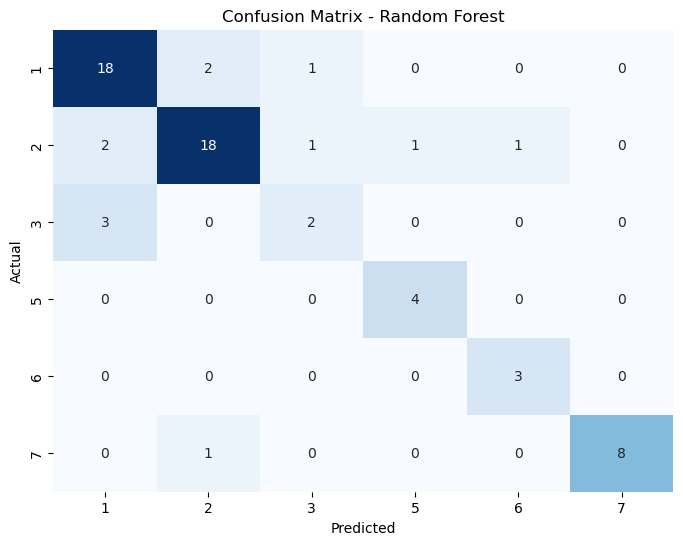


Displaying Feature Importances for Random Forest...


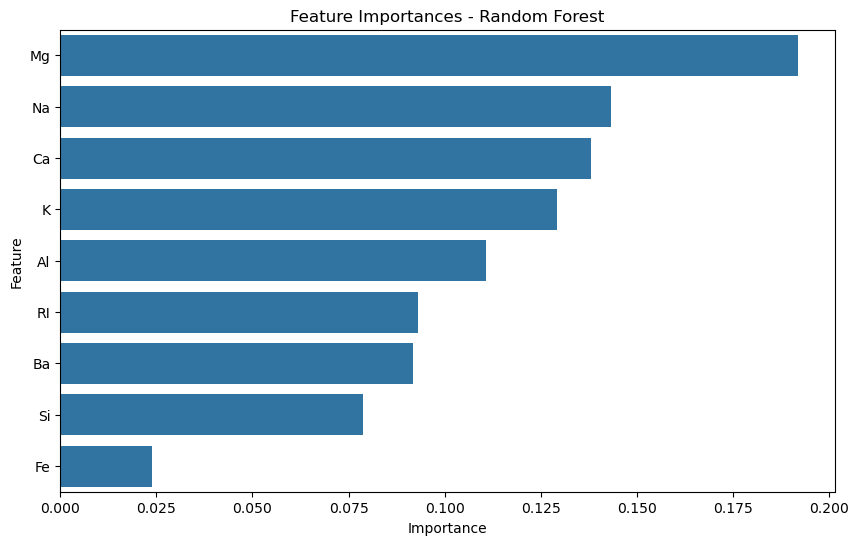

Random Forest model implementation and evaluation complete.


In [8]:

# 4.2 Implement a Random Forest classifier
print("Initializing Random Forest Classifier...")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# 4.3 Train the model on the (resampled) train dataset
print("Training Random Forest model...")
rf_classifier.fit(X_train_resampled, y_train_resampled)
print("Random Forest model trained.")

# Evaluate the performance on test data
print("\nEvaluating Random Forest model performance on the test set...")
y_pred_rf = rf_classifier.predict(X_test)

print("\n--- Random Forest Model Evaluation Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision (macro avg):", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall (macro avg):", recall_score(y_test, y_pred_rf, average='macro'))
print("F1-Score (macro avg):", f1_score(y_test, y_pred_rf, average='macro'))

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix visualization
print("\nDisplaying Confusion Matrix for Random Forest...")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Feature Importances
print("\nDisplaying Feature Importances for Random Forest...")
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
print("Random Forest model implementation and evaluation complete.")

5. Bagging and Boosting Methods Implementation


--- Bagging Classifier Evaluation ---
Accuracy: 0.8153846153846154
Precision (macro avg): 0.7708874458874458
Recall (macro avg): 0.8214400736139865
F1-Score (macro avg): 0.7904332228545635

Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.86      0.84        21
           2       0.86      0.78      0.82        23
           3       0.40      0.40      0.40         5
           5       0.80      1.00      0.89         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.82        65
   macro avg       0.77      0.82      0.79        65
weighted avg       0.82      0.82      0.82        65



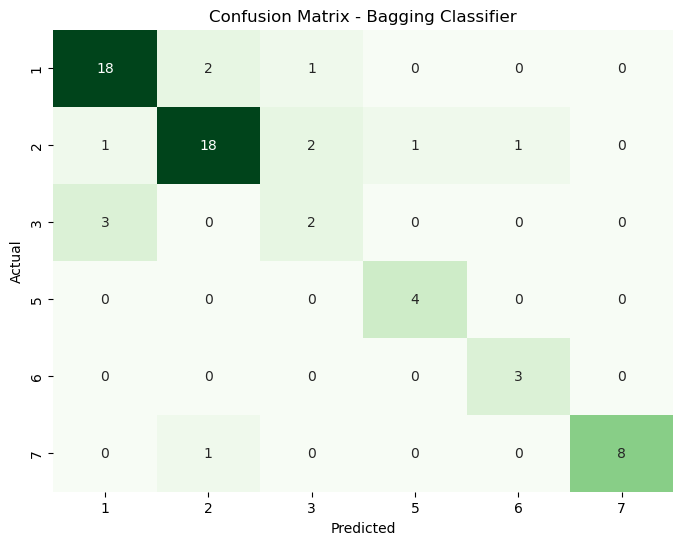


Training Gradient Boosting Classifier...

--- Gradient Boosting Classifier Evaluation ---
Accuracy: 0.8461538461538461
Precision (macro avg): 0.8013888888888889
Recall (macro avg): 0.826909362778928
F1-Score (macro avg): 0.7963517176283134

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.81      0.87        21
           2       0.88      0.91      0.89        23
           3       0.60      0.60      0.60         5
           5       1.00      0.75      0.86         4
           6       0.50      1.00      0.67         3
           7       0.89      0.89      0.89         9

    accuracy                           0.85        65
   macro avg       0.80      0.83      0.80        65
weighted avg       0.87      0.85      0.85        65



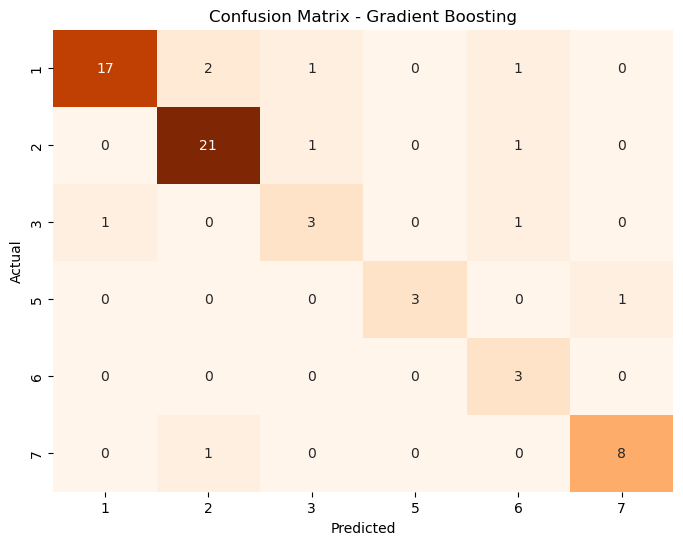


--- Comparison of Model Results ---
Random Forest Accuracy: 0.8154
Bagging Classifier Accuracy: 0.8154
Gradient Boosting Accuracy: 0.8462


In [11]:

from sklearn.tree import DecisionTreeClassifier
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                       n_estimators=100, random_state=42)
bagging_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_bagging = bagging_classifier.predict(X_test)

print("\n--- Bagging Classifier Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Precision (macro avg):", precision_score(y_test, y_pred_bagging, average='macro'))
print("Recall (macro avg):", recall_score(y_test, y_pred_bagging, average='macro'))
print("F1-Score (macro avg):", f1_score(y_test, y_pred_bagging, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging))

cm_bagging = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=np.sort(y.unique()), yticklabels=np.sort(y.unique())) # Use unique values from original y for labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Bagging Classifier')
plt.show()

# Implementing Gradient Boosting Classifier
print("\nTraining Gradient Boosting Classifier...")
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb_classifier.predict(X_test)

print("\n--- Gradient Boosting Classifier Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision (macro avg):", precision_score(y_test, y_pred_gb, average='macro'))
print("Recall (macro avg):", recall_score(y_test, y_pred_gb, average='macro'))
print("F1-Score (macro avg):", f1_score(y_test, y_pred_gb, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=np.sort(y.unique()), yticklabels=np.sort(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

print("\n--- Comparison of Model Results ---")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Bagging Classifier Accuracy: {accuracy_score(y_test, y_pred_bagging):.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")


Additional Notes:

**1. Explain Bagging and Boosting methods. How is it different from each other.**

Bagging (Bootstrap Aggregating) and Boosting are both ensemble learning methods, but they differ in how they build and combine models. Bagging works by training multiple weak learners, usually decision trees, on different random subsets of the dataset created through bootstrapping. Each model is trained independently in parallel, and their results are combined through majority voting (for classification) or averaging (for regression). This mainly helps reduce variance and prevents overfitting. Boosting, on the other hand, trains weak learners sequentially, where each new learner focuses on the mistakes made by the previous ones. Misclassified samples are given more weight, forcing the next model to pay more attention to difficult cases. The predictions are then combined using weighted voting. Boosting is effective at reducing bias and building a strong predictive model but can be more prone to overfitting if not tuned properly.

**2. Explain how to handle imbalance in the data.**

When dealing with imbalanced data, the goal is to ensure the model does not become biased toward the majority class. One way is through data-level techniques such as oversampling the minority class (e.g., using SMOTE to generate synthetic samples) or undersampling the majority class to balance the dataset. Another approach is algorithm-level techniques, where class weights or cost-sensitive learning are used so that misclassifying the minority class is penalized more heavily. Additionally, instead of only relying on accuracy, which can be misleading in such cases, it is better to use evaluation metrics like precision, recall, F1-score, ROC-AUC, or PR-AUC to get a clearer picture of model performance.